## Ch08_Exercise
### 발표자 : 최창순
### 날짜 : 2015년 4월 15일

## Exercise 1

In [27]:
library(rjags)

In [28]:
getwd()

[1] "/Users/neurochoi/Study/bayesianR/part2/ch08/data"

In [29]:
setwd("data/")

ERROR: Error in setwd("data/"): 작업디렉토리를 변경할 수 없습니다


In [31]:
y = c( rep(1,9),rep(0,3) , rep(1,45),rep(0,15) , rep(1,3),rep(0,9)  )
s = c( rep("A",12)       , rep("B",60)         , rep("C",12)        )

In [32]:
y

 [1] 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
[77] 0 0 0 0 0 0 0 0

In [33]:
s

 [1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B"
[20] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[39] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[58] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C"
[77] "C" "C" "C" "C" "C" "C" "C" "C"

In [34]:
write.csv( data.frame(y=y,s=s) , file="Exercise.08.1.csv" , row.names=FALSE) 

In [45]:
# Optional generic preliminaries:
graphics.off() # This closes all of R's graphics windows.
rm(list=ls())  # Careful! This clears all of R's memory!

In [36]:
fileNameRoot="Exercise.08.1" # for output filenames
source("DBDA2E-utilities.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



In [37]:
# Load The data from the file:
myData = read.csv("Exercise.08.1.csv")

In [38]:
str(myData)

'data.frame':	84 obs. of  2 variables:
 $ y: int  1 1 1 1 1 1 1 1 1 0 ...
 $ s: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 1 1 1 1 ...


In [39]:
source("Jags-Ydich-XnomSsubj-MbernBeta.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



In [40]:
# Generate the MCMC chain:
mcmcCoda = genMCMC( data=myData , numSavedSteps=50000 , saveName=fileNameRoot )

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 174

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...


In [41]:
parameterNames = varnames(mcmcCoda) # get all parameter names

In [42]:
parameterNames

[1] "theta[1]" "theta[2]" "theta[3]"

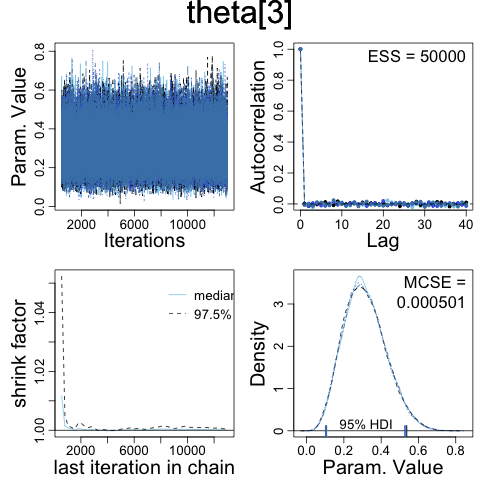

In [16]:
for ( parName in parameterNames ) {
  diagMCMC( codaObject=mcmcCoda , parName=parName )
}

In [43]:
# Get summary statistics of chain:
summaryInfo = smryMCMC( mcmcCoda , compVal=0.5 , rope=c(0.45,0.55) ,
                        compValDiff=0.0 , ropeDiff = c(-0.05,0.05) ,
                        saveName=fileNameRoot )

                         Mean      Median       Mode     ESS HDImass
theta[1]           0.68744829  0.69511368  0.7024145 51257.7    0.95
theta[2]           0.73442321  0.73696029  0.7418483 50000.0    0.95
theta[3]           0.31296253  0.30484867  0.2843055 50000.0    0.95
theta[1]-theta[2] -0.04697492 -0.04119276 -0.0385905 50000.0    0.95
theta[1]-theta[3]  0.37448577  0.38215168  0.4066276 50786.7    0.95
theta[2]-theta[3]  0.42146068  0.42809995  0.4415860 50000.0    0.95
                       HDIlow   HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh
theta[1]           0.46820892 0.8928969     0.5        94.176    0.45     0.55
theta[2]           0.62630071 0.8388778     0.5        99.990    0.45     0.55
theta[3]           0.10348454 0.5315056     0.5         5.912    0.45     0.55
theta[1]-theta[2] -0.29264804 0.1899951     0.0        37.180   -0.05     0.05
theta[1]-theta[3]  0.05655418 0.6702982     0.0        98.624   -0.05     0.05
theta[2]-theta[3]  0.17371214 0.6555382    

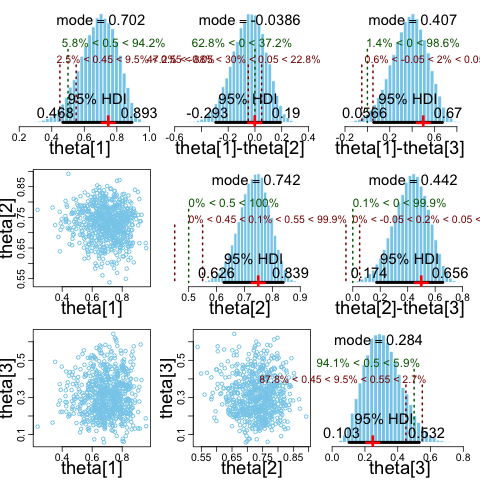

In [44]:
# Display posterior information:
plotMCMC( mcmcCoda , data=myData , compVal=0.5 , rope=c(0.45,0.55) ,
          compValDiff=0.0 , ropeDiff = c(-0.05,0.05)
          )

In [20]:
head(myData)

  y s
1 1 A
2 1 A
3 1 A
4 1 A
5 1 A
6 1 A

In [26]:
mean(subset(myData, myData$s == "A")[,1])
mean(subset(myData, myData$s == "B")[,1])
mean(subset(myData, myData$s == "C")[,1])

[1] 0.75

[1] 0.75

[1] 0.25

## Exercise 2

### ROPE (region of practical equivalence)

http://doingbayesiandataanalysis.blogspot.kr/2013/08/how-much-of-bayesian-posterior.html

In [18]:
summaryInfo = smryMCMC( mcmcCoda , compVal=0.5 , rope=c(0.45,0.55) ,
                        compValDiff=0.0 , ropeDiff = c(-0.05,0.05) )

                        Mean      Median        Mode   ESS HDImass      HDIlow
theta[1]           0.6883531  0.69667005  0.72318916 50000    0.95  0.46666842
theta[2]           0.7345801  0.73720937  0.73963504 50000    0.95  0.62827188
theta[3]           0.3126780  0.30425395  0.28542915 50000    0.95  0.10615008
theta[1]-theta[2] -0.0462270 -0.03943788 -0.01826601 50000    0.95 -0.29390854
theta[1]-theta[3]  0.3756751  0.38300183  0.42071832 50000    0.95  0.06537536
theta[2]-theta[3]  0.4219021  0.42866748  0.43872533 50000    0.95  0.17399881
                    HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh PcntLtROPE
theta[1]          0.8896840     0.5        94.176    0.45     0.55      2.436
theta[2]          0.8411445     0.5        99.994    0.45     0.55      0.000
theta[3]          0.5340182     0.5         5.942    0.45     0.55     87.962
theta[1]-theta[2] 0.1868281     0.0        37.164   -0.05     0.05     46.602
theta[1]-theta[3] 0.6741215     0.0        98.720   -0.05

## Exercise 3


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 35

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...
                         Mean        Median       Mode   ESS HDImass
theta[1]           0.50037727  0.5012936875 0.55119148 50000    0.95
theta[2]           0.50141064  0.4997232293 0.46917635 50000    0.95
theta[1]-theta[2] -0.00103337 -0.0005748646 0.02008446 50000    0.95
                       HDIlow   HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh
theta[1]           0.09306398 0.9003271      NA            NA      NA       NA
theta[2]           0.09614741 0.9074755      NA            NA      NA       NA
theta[1]-theta[2] -0.61127809 0.6093918 

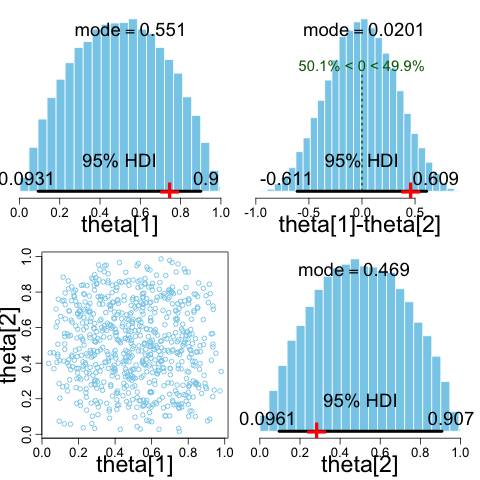

In [19]:
source("Jags-Ydich-XnomSsubj-MbernBeta-Example.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 35

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...
                          Mean        Median       Mode   ESS HDImass
theta[1]           0.499709770  0.5003281438 0.70187127 50000    0.95
theta[2]           0.500779008  0.4998754432 0.20814258 50000    0.95
theta[1]-theta[2] -0.001069238 -0.0002174147 0.00983838 50000    0.95
                        HDIlow   HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh
theta[1]           0.004304388 0.9521632      NA            NA      NA       NA
theta[2]           0.045171395 0.9939994      NA            NA      NA       NA
theta[1]-theta[2] -0.789810991 0.

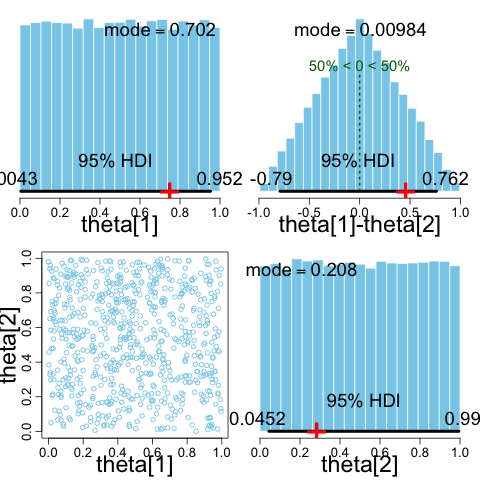

In [21]:
source("Jags-Ydich-XnomSsubj-MbernBeta-Example.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 35

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...
                          Mean      Median         Mode   ESS HDImass
theta[1]           0.498332625  0.49755509  0.028544607 50000    0.95
theta[2]           0.499357427  0.49968190  0.028755833 50000    0.95
theta[1]-theta[2] -0.001024802 -0.00117975 -0.002236244 50000    0.95
                         HDIlow   HDIhigh CompVal PcntGtCompVal ROPElow
theta[1]           1.011542e-09 0.9939526      NA            NA      NA
theta[2]           7.430320e-11 0.9938059      NA            NA      NA
theta[1]-theta[2] -8.976923e-01 0.9490092       0        

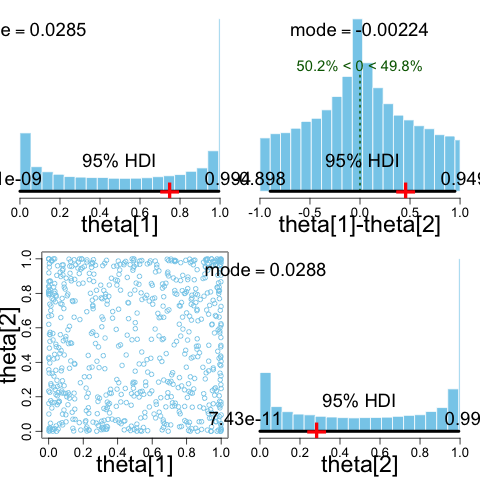

In [22]:
source("Jags-Ydich-XnomSsubj-MbernBeta-Example.R")